### IMPORTS

In [1]:
import nltk
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Train_data = pd.read_csv('Train.csv')

#### Let's have a look at the data and it's features.

In [3]:
Train_data.head(10)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [4]:
Train_data.label.value_counts()

0    20019
1    19981
Name: label, dtype: int64

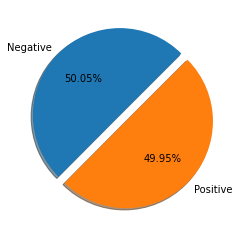

In [5]:
# POSITIVE = 1 AND NEGATIVE = 0
params = {'autopct' : '%.2f%%','shadow':True,'explode': (0,0.1),'startangle':45,
          'labels':['Negative','Positive']}
plt.pie(Train_data.label.value_counts(),**params);
# plt.savefig('label_share.png');

##### So we don't have any class imbalance problems

##### Let's see if length of words in a sentence is different for different sentiments

In [6]:
sr = Train_data.text.str.split()
Train_data['Length'] = sr.apply(lambda x:len(x))

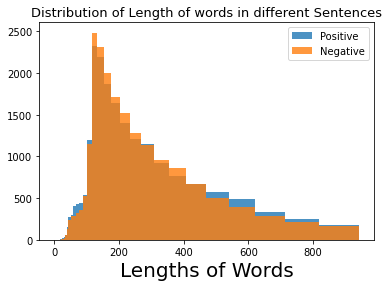

In [19]:
bins = 1.15**np.arange(0,50)
plt.hist(Train_data[Train_data.label==1]['Length'],alpha=0.8,range=[0,1500],bins=bins)  #pos
plt.hist(Train_data[Train_data.label==0]['Length'],alpha=0.8,range=[0,1500],bins=bins)  #neg
# plt.xscale('log')
plt.title('Distribution of Length of words in different Sentences',fontsize=13)
plt.xlabel("Lengths of Words",fontsize=20)
plt.legend(("Positive","Negative"));
# plt.savefig('distribution_of_wrds.png');

##### As the length of sentences (in words) of both the classes have almost same distribution and overlap so this feature is not important. 

In [22]:
Train_data.drop('Length',axis=1,inplace=True)  # dropping Length

#### Pre-processing Text

In [127]:
import re
def preprocess_text(text):
    text = re.sub('<[^>]*>','',text)
    text = re.sub('[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+','',text)
    text = re.sub('[^A-Za-z#]+',' ',text.lower())
    return text

In [128]:
Train_data.text = Train_data.text.apply(preprocess_text)

#### Visualising the text in data

In [129]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [130]:
stop_words = stopwords.words('english')

In [131]:
pos_data = Train_data[Train_data.label==1]['text']
neg_data = Train_data[Train_data.label==0]['text']

In [163]:
def show_cloud(data):
    data = ' '.join([sent for sent in data])
    cleaned_data = ' '.join([word for word in data.split() if (word!='movie' and word!='film' and word!='br')])
    wordcloud = WordCloud(stopwords=stop_words,
                      width=2500,
                      height=2000
                     ).generate(cleaned_data)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
#     wordcloud.to_file('common_words.png')


The Postive Words include--


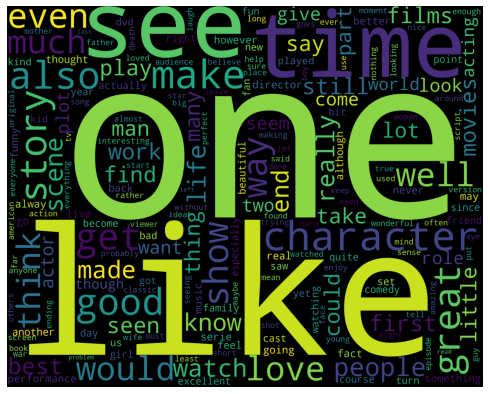

In [143]:
print ('The Postive Words include--')
show_cloud(pos_data)

The Negative Words include--


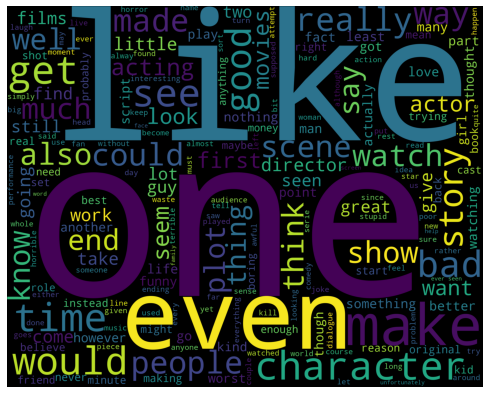

In [141]:
print ('The Negative Words include--')
show_cloud(neg_data)

#### Get Text Features now

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=5).fit(Train_data['text'])

In [148]:
Feature_names = np.array(tv.get_feature_names())

In [149]:
transformed_data = tv.transform(Train_data['text'])

In [150]:
sorted_indices_accto_tfidf_values = transformed_data.max(0).toarray()[0].argsort() 

In [151]:
largest_tfidf_words = Feature_names[sorted_indices_accto_tfidf_values][-1:-101:-1]

In [152]:
largest_tfidf_values = transformed_data.max(0).toarray()[0][sorted_indices_accto_tfidf_values]

In [153]:
print('Top 20 Rare words with their TF-IDF Values---',end='\n\n')
print(np.concatenate((largest_tfidf_words[-1:-21:-1].reshape(-1,1),largest_tfidf_values[-1:-21:-1].reshape(-1,1)),1))     

Top 20 Rare words with their TF-IDF Values---

[['jerk' '0.931872505497761']
 ['mary' '0.9155365060625313']
 ['sheba' '0.9119533150577043']
 ['pack' '0.890326859782169']
 ['cappy' '0.8830640819818633']
 ['beatles' '0.8806694033588539']
 ['joan' '0.8778006787435665']
 ['oprah' '0.8732489981761836']
 ['snakes' '0.867788723073795']
 ['lorelei' '0.8629385550940991']
 ['camp' '0.859457405477728']
 ['alaska' '0.858509127432835']
 ['karloff' '0.8419804737535099']
 ['vc' '0.8352175634779507']
 ['edie' '0.8351533764097253']
 ['buddy' '0.8312658521659766']
 ['zack' '0.8312365835698904']
 ['librarians' '0.8303691849662982']
 ['dentist' '0.8301824220238414']
 ['mencia' '0.8239360878747819']]


Top 100 Rarest words in reviews


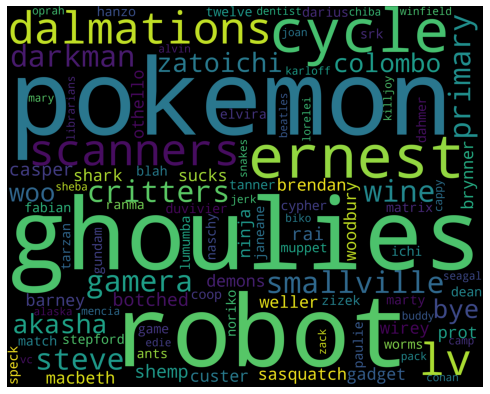

In [154]:
print('Top 100 Rarest words in reviews')
show_cloud(largest_tfidf_words)  #Rarest words

In [157]:
smallest_tfidf_words = Feature_names[sorted_indices_accto_tfidf_values][:100]

In [158]:
smallest_tfidf_values = transformed_data.max(0).toarray()[0][sorted_indices_accto_tfidf_values]

In [159]:
print('Top 20 most-commmon words with their TF-IDF Values---',end='\n\n')
print(np.concatenate((smallest_tfidf_words[:20].reshape(-1,1),smallest_tfidf_values[:20].reshape(-1,1)),1))     

Top 20 most-commmon words with their TF-IDF Values---

[['suplexes' '0.05036143919002117']
 ['ddt' '0.06252489468750388']
 ['punishes' '0.06678759144989364']
 ['mahmoodzada' '0.07069719702554944']
 ['homayoun' '0.07069719702554944']
 ['ershadi' '0.07069719702554944']
 ['funakoshi' '0.0707174166964971']
 ['cavalryman' '0.0709941490680773']
 ['imposition' '0.07115996243291554']
 ['indicted' '0.07121725471266666']
 ['fedor' '0.07133810716813668']
 ['rateyourmusic' '0.07247758525967264']
 ['steamship' '0.07365346173669463']
 ['incomparably' '0.07388787260259162']
 ['jurisdiction' '0.07508043691503745']
 ['patrolman' '0.07511584433369593']
 ['fonts' '0.07525647608816874']
 ['dissolution' '0.07545727316938929']
 ['gauche' '0.0759049930614691']
 ['chokeslam' '0.0762563562373172']]


Top 100 most common words


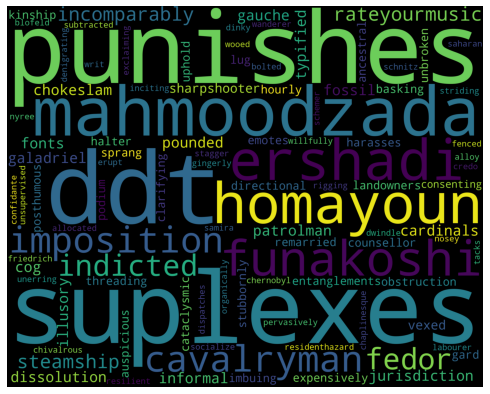

In [160]:
print("Top 100 most common words")
show_cloud(smallest_tfidf_words)

In [164]:
print("Longest word in vocab--->  ",max(tv.get_feature_names(),key=len))

Longest word in vocab--->   uncharacteristically


In [165]:
print("Shortest word in vocab--->  ",min(tv.get_feature_names(),key=len))

Shortest word in vocab--->   aa


### Lemmatization on preprocessed text  (this was passed as a callable to tokenization method in TF-IDF vctorization)

In [125]:
# nltk.download('wordnet')  #RUN THIS IF THE CELL BELOW THROWS AN ERROR

In [1]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [2]:
def lemma(text):
    lemmatized = [lemmatizer.lemmatize(w,'v') for w in text.split()]
    return lemmatized

### Model Building ( Takes 30mins to train on normal hardware)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV

In [57]:
pipe1 = Pipeline([('tfidf',TfidfVectorizer(min_df=5,ngram_range={1,3},tokenizer=lemma)),
                ('clf',LogisticRegressionCV(cv=5,n_jobs=-1,max_iter=500))]);

In [58]:
pipe1.fit(Train_data['text'],Train_data['label']);

### Let's import test set and Evaluate the performance

In [13]:
Test_data = pd.read_csv('Test.csv')

In [116]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred1 = pipe1.predict(Test_data.text)
print("The Logistic Regression accuracy is "+str(accuracy_score(Test_data.label,y_pred1)*100)+"%")

The Logistic Regression accuracy is 91.7%


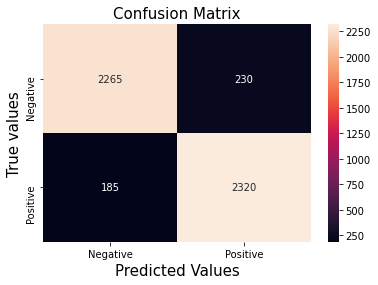

In [118]:
sns.heatmap(confusion_matrix(Test_data.label,y_pred1),annot=True,fmt='g')
plt.title('Confusion Matrix',fontsize=15)
plt.xlabel('Predicted Values',fontsize=15)
plt.ylabel('True values',fontsize=15)
classes = ('Negative','Positive')
plt.xticks((0.5,1.5),labels=classes)
plt.yticks((0.5,1.5),labels=classes);
# plt.savefig('cm.png');

In [169]:
print(classification_report(Test_data.label,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2495
           1       0.91      0.93      0.92      2505

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



#### Custom Predictions

In [119]:
pipe1.predict(['good acting good script over all a must watch!'])

array([1], dtype=int64)

In [120]:
pipe1.predict(["The acting was good but the script wasn't, not a must watch!"])  

array([0], dtype=int64)

In [8]:
pipe1.predict(['i liked the movie'])

array([1], dtype=int64)

In [9]:
pipe1.predict(['i did not like the movie'])

array([0], dtype=int64)

### Saving and then loading a model

In [3]:
import pickle
# pickle.dump(pipe1,open("logistic_model.pkl","wb"))

In [4]:
pipe2 = pickle.load(open("logistic_model.pkl","rb"))

In [7]:
ans = pipe2.predict(['The movie was really bad , had to leave it in the interval.'])
ans

array([0], dtype=int64)

#### Remember when you load the model in some other script, u will need the lemma function. 